In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start,end_date=end)

In [6]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [7]:
# creates normalized return for each stock
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close'] 

In [8]:
# Sample Portfolio
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [32]:
for stock_df, allo in zip((aapl, cisco,ibm,amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [33]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,30000.000000
2012-01-04,53.132802,1.005374,0.301612,30161.223646
2012-01-05,53.722681,1.016536,0.304961,30496.072757
2012-01-06,54.284287,1.027162,0.308149,30814.872456
2012-01-09,54.198183,1.025533,0.307660,30765.994699


In [44]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [45]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [46]:
all_position_vals = [aapl['Position Values'], cisco['Position Values'],
                    ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_position_vals, axis=1)

portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [47]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [48]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

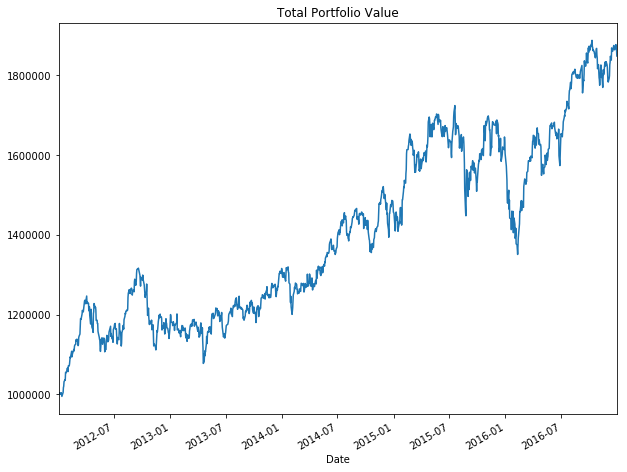

In [50]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

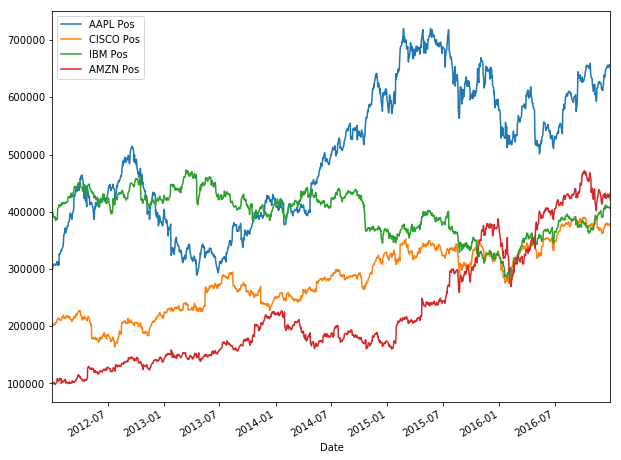

In [51]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

## Portfolio Stats

In [52]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [53]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [54]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [55]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [56]:
portfolio_val['Daily Return'].std()

0.010568287769161718

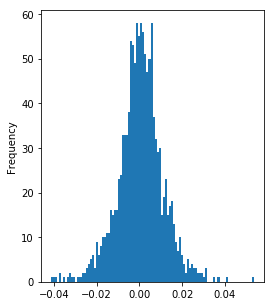

In [57]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(4,5))

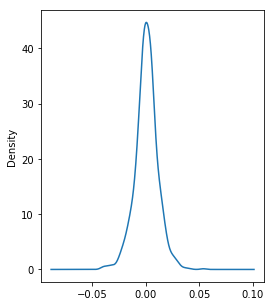

In [58]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4,5))

In [59]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [60]:
cumulative_return

84.742851816655445

In [61]:
# Sharpe Ratio
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [62]:
SR

0.05149680662648092

In [63]:
# annualized sharpe ratio
ASR = (252**0.5) * SR

In [64]:
ASR

0.8174864618859096

In [65]:
# Sharpe Ratio greater than 1 is good